In [22]:
from sklearn.datasets import make_friedman1
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, AdaBoostRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import colors

import pandas as pd
import tqdm

import IPython.core.display

%matplotlib inline
IPython.core.display.display(IPython.core.display.HTML("<style>.container { width:100% !important; }</style>"))

Lots of boring stuff to make the figures look similar to those in the paper.

In [23]:
plt.rc('grid', linestyle="-", color='black')
cmap = colors.ListedColormap(['lightskyblue', 'orange'])

# Traditional Classifiers:

$$ y = \beta X + \sigma $$

We are looking to estimate $\beta$ as well as we possibly can from a limited number of observations.

In [24]:


# Generate a non-linear dataset with lots of complex features
X, y = make_friedman1(n_samples=100, n_features=55, random_state=42)

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Normal picture of overfitting with linear models.  We do very well on the training set, but generalize poorly because we fit too well to the idiosyncrasies of the train data

In [25]:
# Train and fit a linear model 
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Print R^2 of linear model on held out test data
print (linear_model.score(X_train, y_train))
print (linear_model.score(X_test, y_test))

0.909735045186
-0.0258985356803


### Ridge regression penalizes model complexity with an $L_2$ norm on the $\beta$ coefficients enforcing simpler models.  We trade off train performance for test performance

In [26]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
# Print R^2 of linear model on held out test data

print (ridge_model.score(X_train, y_train))
print (ridge_model.score(X_test, y_test))

0.864588867586
0.374008212802


## Now: let's look at what adaboost is doing instead

In [27]:
base_model = DecisionTreeRegressor(max_depth=8)
# Print R^2 of linear model on held out test data

for n_estimators in [2, 5, 10, 50, 100, 500]:
    
    base_reg = DecisionTreeRegressor(max_depth=8)
    ada_model = AdaBoostRegressor(base_estimator=base_reg, n_estimators=n_estimators)
    ada_model.fit(X_train, y_train)
    
    print ('\n Number of Esimators: {}'.format(n_estimators))
    print (ada_model.score(X_train, y_train))
    print (ada_model.score(X_test, y_test))


 Number of Esimators: 2
0.278067960576
-0.28049402222

 Number of Esimators: 5
0.991715799844
0.19223755698

 Number of Esimators: 10
0.998361359006
0.455422372789

 Number of Esimators: 50
0.999959257735
0.513098461597

 Number of Esimators: 100
1.0
0.495038625022

 Number of Esimators: 500
0.999998796123
0.455546189753


# Interpolating Classifiers:

![](Figures/Figure2.png) 

In [28]:
def plot_decision_boundary(X, y=None, clf=None, plot_step = 0.025,
                           ax=None, n_classes=2, plot_colors = "br",
                           plot_data=True):
    """
    Adapted from: http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html
    """
    Z = None
    
    if y is None:
        n_classes = 1
        y = np.array([0]*len(X))

    x_min = y_min = 0
    x_max = y_max = 1
     
    if ax is None:
        fig = plt.figure(figsize=(6,6))
        ax = fig.add_subplot(111, aspect='equal')
        
    if clf is not None:
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = (Z.reshape(xx.shape) > 0.5).astype('float32')
        hb = ax.imshow(Z, extent=(x_min, x_max, y_min, y_max), cmap=cmap)  
    
    if plot_data:
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            ax.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,
                       s=10.0)
                    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    # major ticks every 20, minor ticks every 5                                      
    major_ticks = np.linspace(0, 1, 6)                                              
    minor_ticks = np.linspace(0, 1, 21)                                               

    ax.set_xticks(major_ticks)                                                       
    ax.set_xticks(minor_ticks, minor=True)                                           
    ax.set_yticks(major_ticks)                                                       
    ax.set_yticks(minor_ticks, minor=True)
    
    ax.grid(which='minor')
    return Z

# Figure 5

In [29]:
# Figure 1:
n_dims = 2
n_samples = 400
p = 0.8

X = np.random.uniform(size=(n_samples, n_dims))

# randomly make 75% of them red.
y = np.random.uniform(size=n_samples)
y = (y > p).astype('int')

In [30]:
# Absolutely necessary to replicate results.  Without
# setting max depth we don't get the observed behaviour.
base_clf = DecisionTreeClassifier(max_depth=8)

ada_clf = AdaBoostClassifier(base_estimator=base_clf, n_estimators=6)
rf_clf = RandomForestClassifier(n_estimators=6)
nn_clf = KNeighborsClassifier(n_neighbors=1)

all_clfs = [ada_clf, rf_clf, nn_clf]

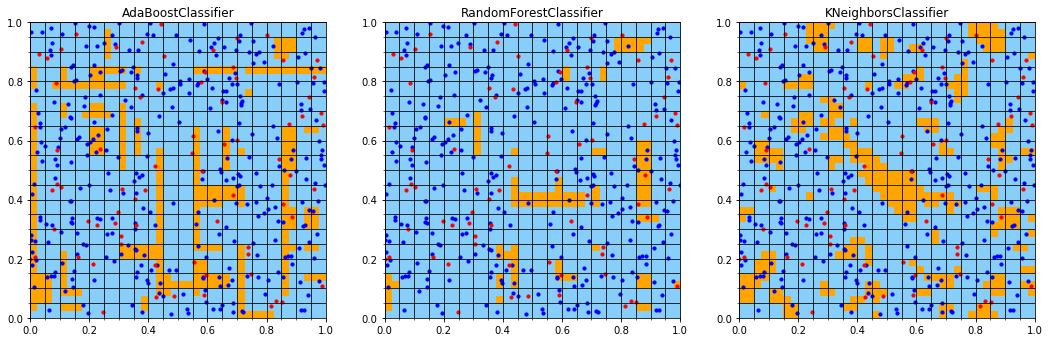

In [31]:
fig = plt.figure(figsize=(18, 6))
rates = {}

for ax_idx, clf in enumerate(all_clfs):
    clf.fit(X, y)
    
    ax = fig.add_subplot(1, 3, ax_idx+1)
    Z = plot_decision_boundary(X, y, clf=clf, ax=ax, plot_data=True)
    
    clf_name = clf.__class__.__name__
    rates[clf_name] = Z.sum() / Z.size
    ax.set_title(clf_name, fontsize=12)

# Figure 6

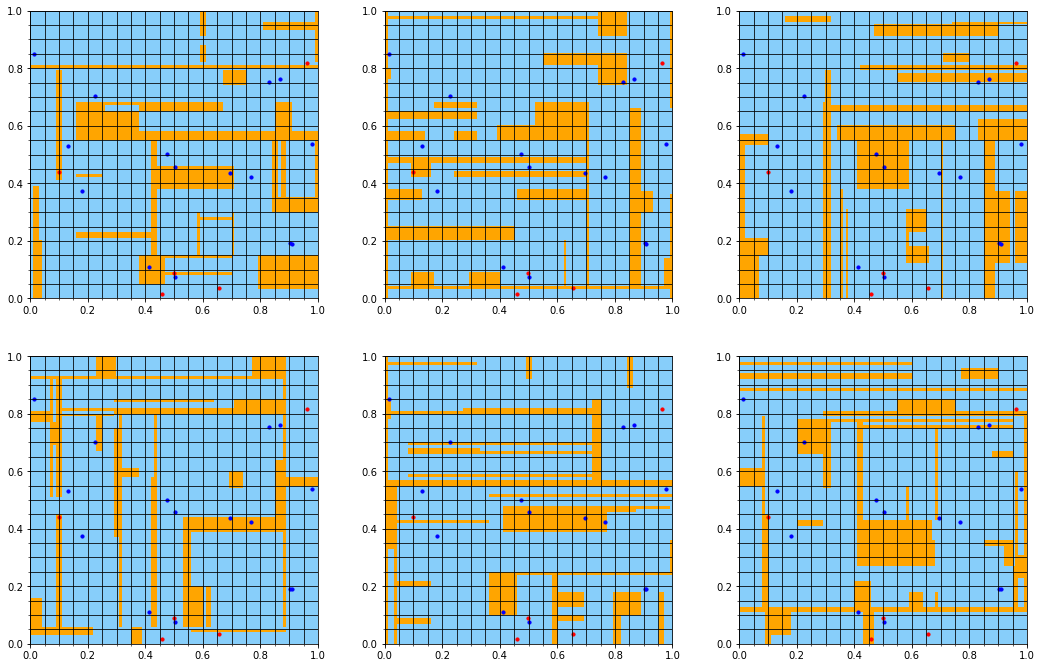

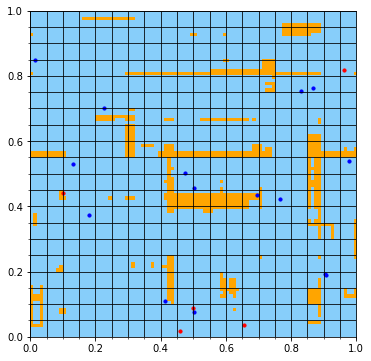

In [32]:
# Figure 1:
n_dims = 2
n_samples = 20
p = 0.7

X = np.random.uniform(size=(n_samples, n_dims))

# randomly make 75% of them red.
y = np.random.uniform(size=n_samples)
y = (y > p).astype('int')


fig = plt.figure(figsize=(18, 18))

for ax_idx, tree_clf in enumerate(rf_clf.estimators_):
    
    ax = fig.add_subplot(3, 3, ax_idx+1)
    _ = plot_decision_boundary(X, y, clf=tree_clf, plot_step=0.01, ax=ax)
    
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
_ = plot_decision_boundary(X, y, clf=rf_clf, plot_step=0.01, ax=ax)

# Figure 7

In [33]:
n_dims = 2
n_samples = 1000

X = np.random.uniform(size=(n_samples, n_dims))

# points are in the circle if the vector norm
# is bigger than 0.4 - subtract 0.5 with broadcasting
# to center it
in_circle = np.linalg.norm(X-0.5, axis=1) > 0.4
outside_circle = in_circle == 0

y = np.random.uniform(size=(n_samples,))

y[in_circle] = y[in_circle] > 0.9  # 10% inside circle
y[outside_circle] = y[outside_circle] > 0.1  # 90% inside circle


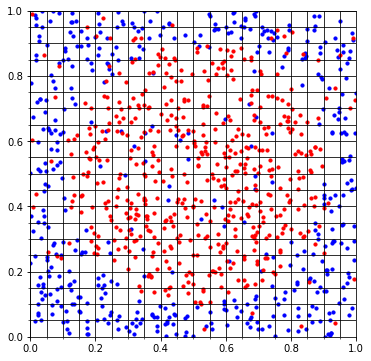

In [34]:
plot_decision_boundary(X, y)

In [35]:
ada_clf = AdaBoostClassifier(base_estimator=base_clf, n_estimators=500)
rf_clf = RandomForestClassifier(n_estimators=500)
nn_clf = KNeighborsClassifier(n_neighbors=1)
tree_clf = DecisionTreeClassifier()

all_clfs = [nn_clf, ada_clf, rf_clf, tree_clf]

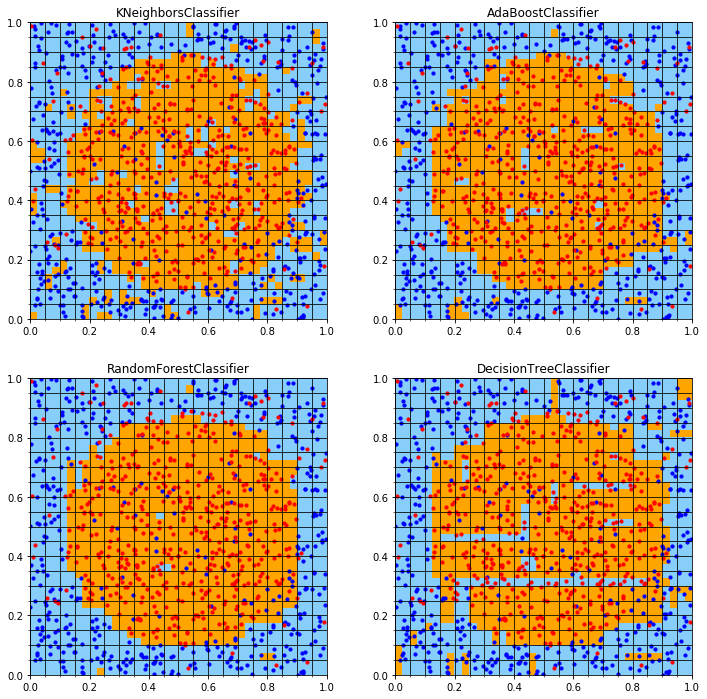

In [36]:
fig = plt.figure(figsize=(12, 12))
rates = {}

for ax_idx, clf in enumerate(all_clfs):
    clf.fit(X, y)
    
    ax = fig.add_subplot(2, 2, ax_idx+1)
    Z = plot_decision_boundary(X, y, clf=clf, ax=ax, plot_data=True)
    
    clf_name = clf.__class__.__name__
    rates[clf_name] = Z.sum() / Z.size
    ax.set_title(clf_name, fontsize=12)

# Figure 8

In [37]:
n_dims = 10
n_samples = 4000

base_clf = DecisionTreeClassifier(max_depth=8)
ada_clf = AdaBoostClassifier(base_estimator=base_clf, n_estimators=n_estimators)

X_train = np.random.uniform(size=(n_samples, n_dims))
y_train = np.random.uniform(size=(n_samples,)) > 0.8

n_test_samples = 10000
X_test = np.random.uniform(size=(n_test_samples, n_dims))

recalculate_figures = False

if recalculate_figures:
    scores = []
    for n_estimators in range(1, 250, 2):
        
        ada_clf.fit(X_train, y_train)

        pred = ada_clf.predict(X_test)
        pos_fraction = (pred.sum() / n_test_samples)

        scores.append(pos_fraction)
    scores = np.array(scores)
    np.save('Scores_10_Dims.npy', scores)
    
else:
    scores = np.load('Scores_10_Dims.npy')

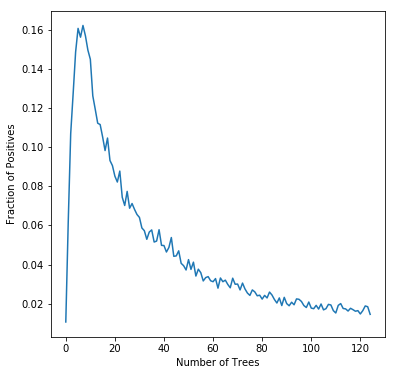

In [38]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.plot(scores)
ax.set_xlabel('Number of Trees')
ax.set_ylabel('Fraction of Positives')

# Non-statistical view of Adaboost

![](Figures/Adaboost_Decomposition.png) 

### More simulations: use Adaboost to tackle a harder problem.

![](Figures/Border_Interpolation.png) 

### We interpreted the formula as: 

$$ P(y=1\mid x) = 0.2 + 0.6 \times \Big(\big(\sum_{j=1}^2 x_j \big) > 1 \Big)$$


In [39]:
n_dims = 5
n_samples = 400

X_train = np.random.uniform(size=(n_samples, n_dims))
y_train = 0.2 + 0.6 * np.sum(X_train[:, :2], axis=1) > 1

X_test = np.random.uniform(size=(n_samples, n_dims))
y_test = 0.2 + 0.6 * np.sum(X_test[:, :2], axis=1) > 1

### Error at Bayes Boundary

![](Figures/Adaboost_Errors.png) 

In [40]:
if recalculate_figures:

    scores_dict = {}
    
    df = pd.read_csv('phonomene_dataset.csv', header=None)
    y = df[5].values
    X = df[list(range(5))].values
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    for estimator_depth in tqdm.tqdm_notebook(range(1, 8)):
        scores_dict[('train', estimator_depth)] = {}
        scores_dict[('test', estimator_depth)] = {}

        for n_estimators in tqdm.tqdm_notebook(range(1, 250, 2)):
            base_clf = DecisionTreeClassifier(max_depth=estimator_depth)
            ada_clf = AdaBoostClassifier(base_estimator=base_clf, n_estimators=n_estimators)

            ada_clf.fit(X_train, y_train)

            scores_dict[('train', estimator_depth)][n_estimators] = ada_clf.score(X_train, y_train)
            scores_dict[('test', estimator_depth)][n_estimators] = ada_clf.score(X_test, y_test)

        scores_df = pd.DataFrame(scores_dict)
        scores_df.columns.rename(['dataset', 'max_depth'], inplace=True)
        scores_df.to_csv('phonomene_scores.csv')
else:
    scores_df = pd.read_csv('phonomene_scores.csv', header=[0, 1])

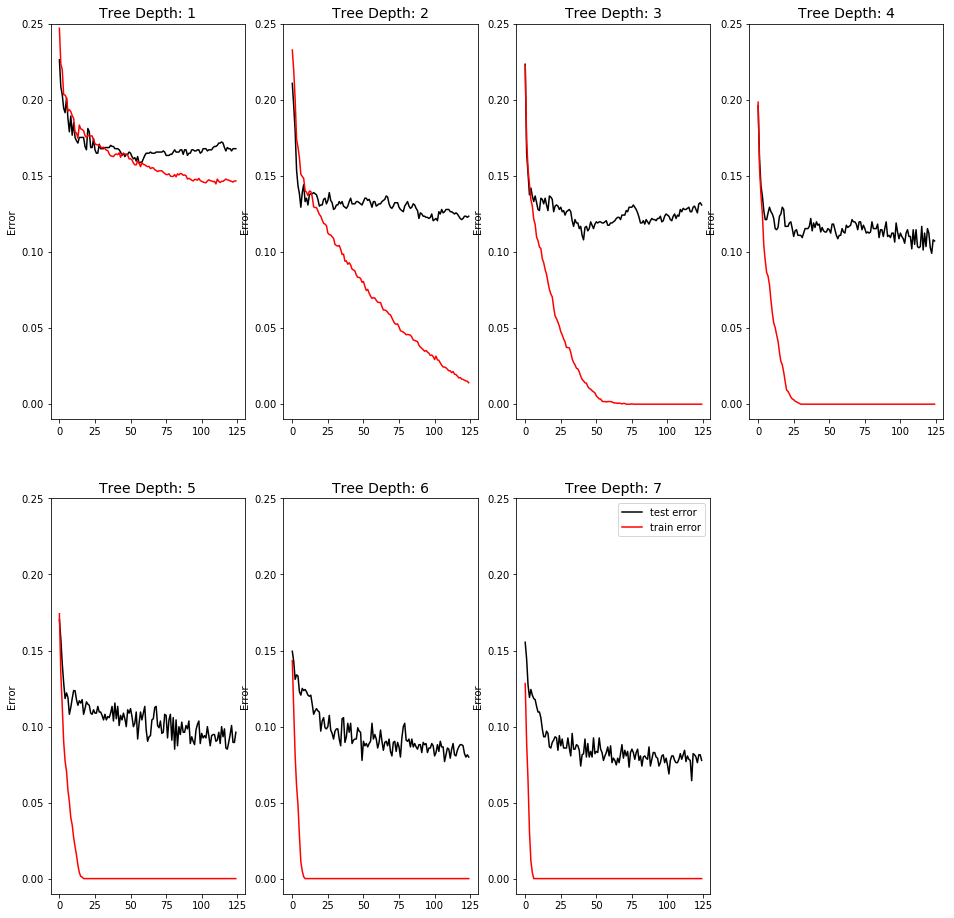

In [41]:
fig = plt.figure(figsize=(16, 16))

for estimator_depth in tqdm.tqdm_notebook(range(1, 8)):
    i = str(estimator_depth)
    ax = fig.add_subplot(2, 4, estimator_depth)
    ax.plot(1-scores_df['test'][i], color='black', label='test error')
    ax.plot(1-scores_df['train'][i], color='red', label='train error')
    
    ax.set_ylim(-0.01, 0.25)
    ax.set_title('Tree Depth: {}'.format(estimator_depth), fontsize=14)
    ax.set_ylabel('Error')
    
ax.legend()

# Shallow or Deep Trees?

![](Figures/Tree_Error.png) 

# Key take-aways:

- The statistical view of AdaBoost advocated by Hastie has a hard time explaining why AdaBoost keeps working long after you completely overfit the training set
- AdaBoost works better using deep trees as base learners, rather than shallow trees (again, contra Hastie)
- At 'steady state' the extra learners from AdaBoost help 'smooth out' the decision surface: similar to Random Forest

### Connections to deep learning?

![](Figures/Deep_Learning_And_Generalization.png) 

![](Figures/NN_training.png) 

Commonly used neural network architectures can reach 100% accuracy on completely random data - they have sufficient capacity to perfectly memorize the training set.  How do those networks actually generalize?